## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
im = cv2.imread('elephant.jpg') # read an image in BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image=im.shape
print(im.shape)

In [2]:
plt.imshow(im)
plt.show()

NameError: name 'im' is not defined

In [4]:
# flatten each channel of the image in linear array 

all_pixels = im.reshape((330*500, 3))
print(all_pixels.shape)

# one linear array for each color, (red , green , and blue channel)

(165000, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[  1   0   1]
 [174 145 128]
 [ 99  95 118]
 [ 38  35  64]]


# Plot all colors 

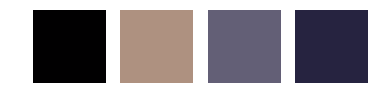

In [8]:
plt.figure(0,figsize=(6,2))

i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    # Color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

# Segmenting Our Original Image

In [9]:
new_img = np.zeros((330*500, 3), dtype='uint8')

print(new_img.shape)

(165000, 3)


In [10]:
colors

[array([1, 0, 1], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [11]:
km.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

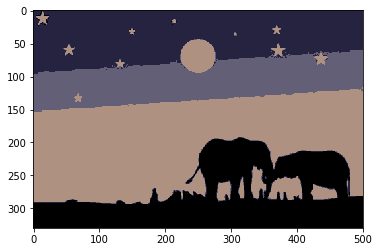

In [13]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
# print(original_image)    
    
new_img = new_img.reshape((original_image))
# print(new_img.shape)
plt.imshow(new_img)
plt.show()